In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [2]:
fantasy_file = Path("Resources/fantasy_merged_7_17.csv")
fantasy_adp_file = Path("Resources/adp_merged_7_17.csv")

In [3]:
fantasy_stats = pd.read_csv(fantasy_file)
fantasy_adp = pd.read_csv(fantasy_adp_file)
fantasy_merged = pd.merge(fantasy_stats, fantasy_adp, how="left", on=["PlayerID"])
fantasy_merged_clean = fantasy_merged.fillna(0)
fantasy_stats_clean = fantasy_stats.fillna(0)
fantasy_total = fantasy_stats_clean.groupby(by= ["Year", "FantPos"]).sum()["PPR"]
fantasy_avg = fantasy_stats_clean.groupby(by= ["Year", "FantPos"]).mean()["PPR"]

C:\Users\sshoj\AppData\Local\Temp\ipykernel_9028\3627394354.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fantasy_total = fantasy_stats_clean.groupby(by= ["Year", "FantPos"]).sum()["PPR"]
C:\Users\sshoj\AppData\Local\Temp\ipykernel_9028\3627394354.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fantasy_avg = fantasy_stats_clean.groupby(by= ["Year", "FantPos"]).mean()["PPR"]


In [4]:
#More Rushing yards or Receiving yards by season

In [5]:
fantasy_stats_clean

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,573,Nate Sudfeld,DET,QB,29,2,0,0,0,0,...,0,0,0.00,0,0,0,-0.4,SudfNa00,80.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022
3385,575,Chad Henne,KAN,QB,37,3,0,0,2,0,...,0,0,0.00,0,1,0,-0.5,HennCh01,81.0,2022
3386,576,C.J. Beathard,JAX,QB,29,4,0,7,11,35,...,0,0,0.00,0,0,0,-1.0,BeatC.00,82.0,2022


In [6]:
fantasy_avg

Year  FantPos
2017  QB         109.669863
      RB          77.126282
      TE          57.175490
      WR          79.141667
2018  QB         121.843836
      RB          80.744156
      TE          54.189286
      WR          85.352381
2019  QB         123.785714
      RB          80.527632
      TE          53.550000
      WR          79.777169
2020  QB         117.053086
      RB          74.979630
      TE          56.447368
      WR          86.342009
2021  QB         112.314634
      RB          76.012575
      TE          56.054237
      WR          82.646256
2022  QB         104.777108
      RB          75.731481
      TE          56.792105
      WR          81.570642
Name: PPR, dtype: float64

In [7]:
avg_df = pd.DataFrame(fantasy_avg)

In [8]:
avg_df

PPR
Year FantPos            
2017 QB       109.669863
     RB        77.126282
     TE        57.175490
     WR        79.141667
2018 QB       121.843836
     RB        80.744156
     TE        54.189286
     WR        85.352381
2019 QB       123.785714
     RB        80.527632
     TE        53.550000
     WR        79.777169
2020 QB       117.053086
     RB        74.979630
     TE        56.447368
     WR        86.342009
2021 QB       112.314634
     RB        76.012575
     TE        56.054237
     WR        82.646256
2022 QB       104.777108
     RB        75.731481
     TE        56.792105
     WR        81.570642

In [9]:
fantasy_year = fantasy_stats_clean["Year"]

In [10]:
avg_df.index

MultiIndex([(2017, 'QB'),
            (2017, 'RB'),
            (2017, 'TE'),
            (2017, 'WR'),
            (2018, 'QB'),
            (2018, 'RB'),
            (2018, 'TE'),
            (2018, 'WR'),
            (2019, 'QB'),
            (2019, 'RB'),
            (2019, 'TE'),
            (2019, 'WR'),
            (2020, 'QB'),
            (2020, 'RB'),
            (2020, 'TE'),
            (2020, 'WR'),
            (2021, 'QB'),
            (2021, 'RB'),
            (2021, 'TE'),
            (2021, 'WR'),
            (2022, 'QB'),
            (2022, 'RB'),
            (2022, 'TE'),
            (2022, 'WR')],
           names=['Year', 'FantPos'])

In [11]:
fantasy_avg[2017, "QB"]

109.66986301369863

In [12]:
fantasy_avg[2018, "QB"]

121.84383561643835

In [13]:
fantasy_avg[2019, "QB"]

123.78571428571429

In [14]:
fantasy_avg[2017, "QB"]

109.66986301369863

In [15]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
fant_pos = ["QB", "WR", "RB", "TE"]

In [16]:
for pos in fant_pos:
    print(" ")
    for year in years:
        print("years = ", year)
        print("fant_pos = ", pos)
        print("PPR = ", fantasy_avg[year, pos])

 
years =  2017
fant_pos =  QB
PPR =  109.66986301369863
years =  2018
fant_pos =  QB
PPR =  121.84383561643835
years =  2019
fant_pos =  QB
PPR =  123.78571428571429
years =  2020
fant_pos =  QB
PPR =  117.05308641975307
years =  2021
fant_pos =  QB
PPR =  112.31463414634146
years =  2022
fant_pos =  QB
PPR =  104.77710843373494
 
years =  2017
fant_pos =  WR
PPR =  79.14166666666667
years =  2018
fant_pos =  WR
PPR =  85.35238095238095
years =  2019
fant_pos =  WR
PPR =  79.77716894977169
years =  2020
fant_pos =  WR
PPR =  86.3420091324201
years =  2021
fant_pos =  WR
PPR =  82.64625550660793
years =  2022
fant_pos =  WR
PPR =  81.57064220183487
 
years =  2017
fant_pos =  RB
PPR =  77.12628205128206
years =  2018
fant_pos =  RB
PPR =  80.74415584415584
years =  2019
fant_pos =  RB
PPR =  80.52763157894738
years =  2020
fant_pos =  RB
PPR =  74.97962962962963
years =  2021
fant_pos =  RB
PPR =  76.0125748502994
years =  2022
fant_pos =  RB
PPR =  75.73148148148148
 
years =  2017
fa

In [17]:
colors = ["#0000ff", "#00ff00", "#ff0000", "#ffff00"]

In [18]:
colors[1]

'#00ff00'

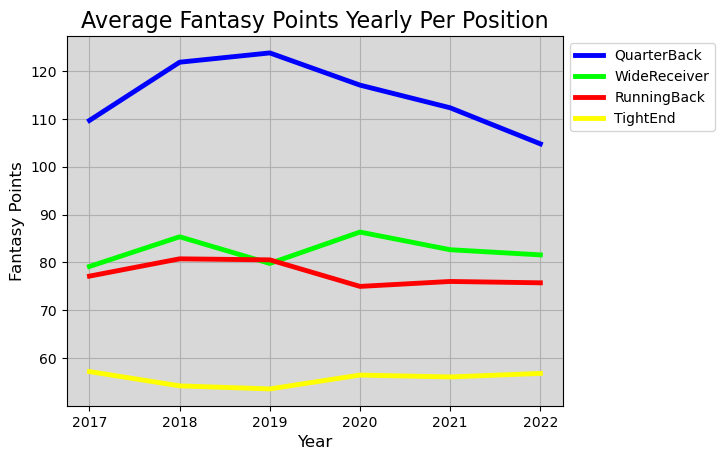

In [30]:
plt.axes().set_facecolor("#d8d8d8")
count = -1
for pos in fant_pos:
    count = count + 1
    #Empty List for Average PPR yearly 
    avg_ppr = []
    for year in years:
        # Extracting PPR from series
        PPR = fantasy_avg[year, pos]
        # Adding PPR to empty list
        avg_ppr.append(PPR)

    plt.plot(years,
             avg_ppr,
            linewidth = 3.5,
            color = colors[count])
    
plt.title("Average Fantasy Points Yearly Per Position", fontsize = 16)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Fantasy Points", fontsize = 12)
plt.legend(["QuarterBack", "WideReceiver", "RunningBack", "TightEnd"], 
            bbox_to_anchor=(1, 1))
plt.grid()
        

<Figure size 640x480 with 0 Axes>